In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


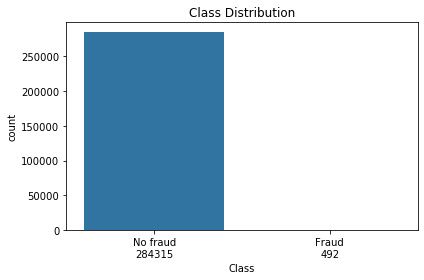

In [61]:
ax = sns.countplot('Class', data=df)
ax.set_title('Class Distribution')
# for p in ax.patches:
#     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), va='top', color='black', size=18) #ha='center',
x_labels = ['No fraud\n284315','Fraud\n492']
ax.set_xticklabels(x_labels)

plt.tight_layout()
plt.savefig('output/class_distribution.png')

In [74]:
df_f = df.loc[df['Class'] == 1]
df_nf = df.loc[df['Class'] == 0]
df_balanced = pd.concat([df_f, df_nf.sample(frac=1)[:492]]).sort_index()

In [23]:
amount_val = df['Amount'].values
amount_val_f = df_f['Amount'].values
amount_val_nf = df_nf['Amount'].values
time_val = df['Time'].values
time_val_f = df_f['Time'].values
time_val_nf = df_nf['Time'].values

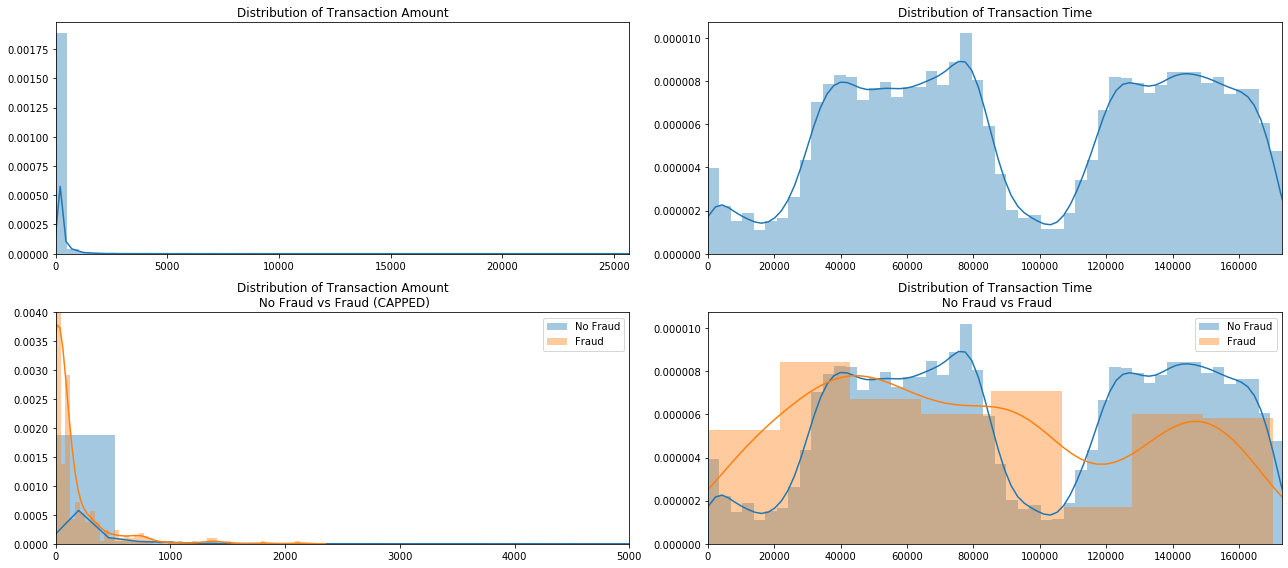

In [66]:
fig, ax = plt.subplots(2, 2, figsize=(18,8))

sns.distplot(amount_val, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of Transaction Amount')
ax[0, 0].set_xlim([0, 25691.16])
# ax[0, 0].set_ylim(0, 0.004)

sns.distplot(time_val, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Transaction Time')
ax[0, 1].set_xlim([0, 172792])

sns.distplot(amount_val_nf, ax=ax[1, 0], label='No Fraud')
sns.distplot(amount_val_f, ax=ax[1, 0], label='Fraud')
ax[1, 0].set_title('Distribution of Transaction Amount\n No Fraud vs Fraud (CAPPED)')
ax[1, 0].set_xlim([0, 5000])
ax[1, 0].set_ylim(0, 0.004)
ax[1, 0].legend(loc="upper right")

sns.distplot(time_val_nf, ax=ax[1, 1], label='No Fraud')
sns.distplot(time_val_f, ax=ax[1, 1], label='Fraud')
ax[1, 1].set_title('Distribution of Transaction Time\n No Fraud vs Fraud')
ax[1, 1].set_xlim([0, 172792])
ax[1, 1].legend(loc="upper right")

plt.tight_layout()
plt.savefig('output/transaction_distribution.png')
plt.show()

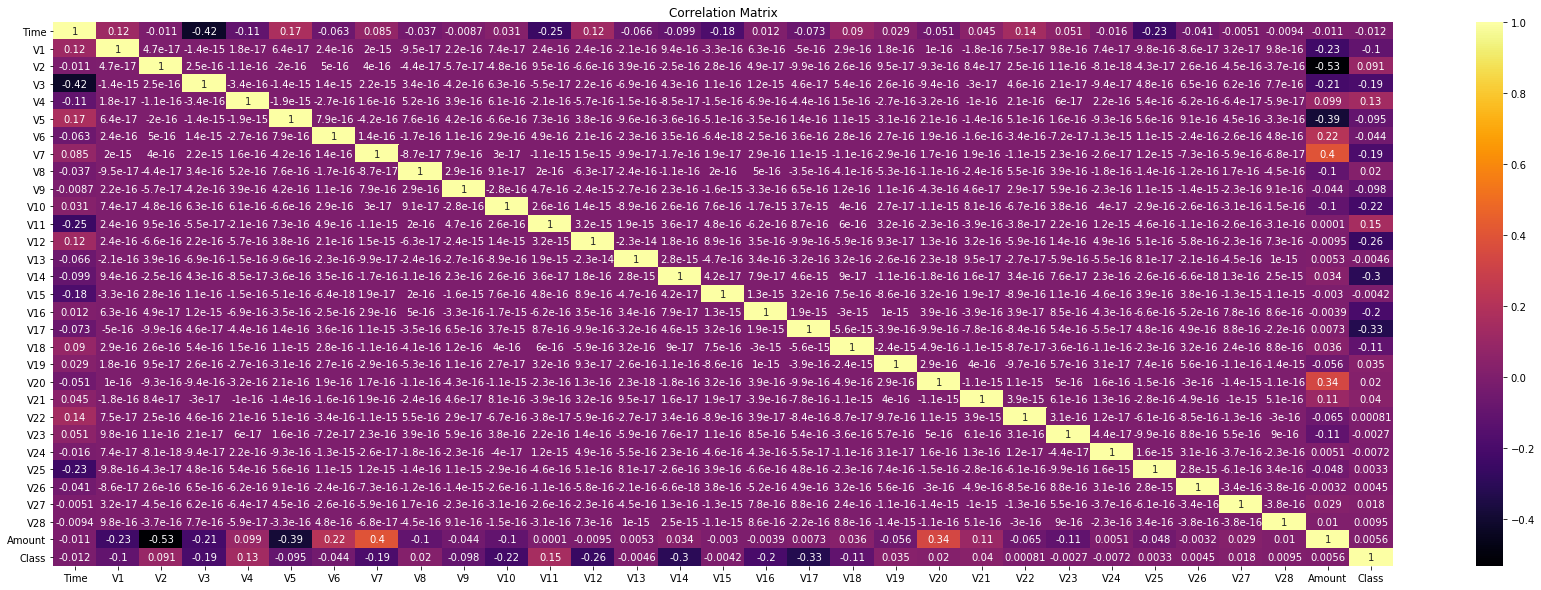

In [131]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='inferno', ax=ax)
ax.set_title('Correlation Matrix')

plt.savefig('output/correlation.png')
plt.show()

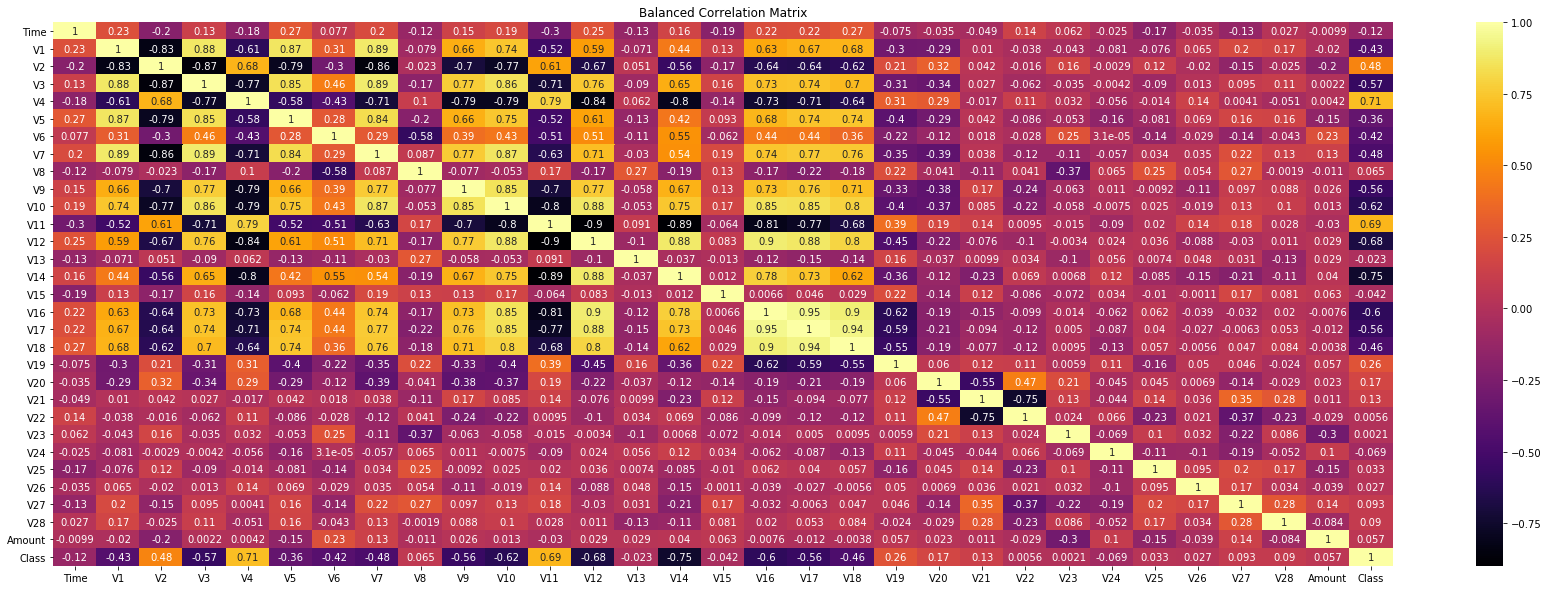

In [132]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
cor = df_balanced.corr()
sns.heatmap(cor, annot=True, ax=ax, cmap='inferno')
ax.set_title('Balanced Correlation Matrix')

plt.savefig('output/correlation_balanced.png')
plt.show()